# IN THE NAME OF GOD:)


# PARHAM YAZDEKHASTI 9638033
# ALI ZINDARI 9629183

# WE DIDN'T USE ANY FUZZY LOGIC , PACKAGES INSTEAD WE IMPLEMENTED EVERY THING FROM SCRATCH !!!!!!!!

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import cv2 as cv

# Implementation of triangle membership function and it's features

In [158]:
class triangle:
    def __init__(self,ps,pm,pe):
        self.ps = ps
        self.pm = pm
        self.pe = pe

        self.a1 = (pm[1] - ps[1]) / (pm[0] - ps[0])
        self.a2 = (pe[1] - pm[1]) / (pe[0] - pm[0])

        self.b1 = pm[1] - self.a1* pm[0]
        self.b2 = pm[1] - self.a2* pm[0]
        #print(self.a1, self.a2,self.b1,self.b2)

    def evaluate(self, x):
        if x < self.ps[0] or x > self.pe[0]:
            return 0

        if x< self.pm[0]:
            return self.a1 * x + self.b1
        else:
             return self.a2 * x + self.b2

    def to_array(self):
        return [self.ps[0], self.pm[0], self.pe[0]]




# A class for Fuzzy rules and it's features

In [159]:

class rule:
    def __init__(self, I1, I2, O):
        self.i1 = I1
        self.i2 = I2
        self.o = O
        self.degree = 0
        
        self.names_fi = {
            -65: "s3",
            0:'s2',
            52.5:'s1',
            90:'ce',
            127.5:'e1',
            180:'b2',
            245:'b3',
        }
        
        self.names_x = {
            1.5:'s2',
            7:'s1',
            10:'ce',
            13:'b1',
            18.5:'b2'
        }
        
        self.names_theta = {
            -40:'s3',
            -20:'s2',
            -7:'s1',
            0:'ce',
            7:'b1',
            20:'b2',
            40:'b3'
        }
    
    def cal_degree(self, fi, x, theta, uni_fi, uni_x, uni_theta):
        m1 = findmax(fi,uni_fi)[1]
        m2 = findmax(x, uni_x)[1]
        m3 = findmax(theta,uni_theta)[1]
        self.degree = m1*m2*m3
        return self.degree

    def eval(self, x, fi):
        score = self.i1.evaluate(x) * self.i2.evaluate(fi)
        mid = self.o.pm[0]
        return mid, score
    
    def show_me(self):
        print('if x is '+self.names_x[self.i1.pm[0]]+ ' and fi is '+self.names_fi[self.i2.pm[0]]+
              ' then theta is '+self.names_theta[self.o.pm[0]])




# Here is some useful functions consist of :
# - find best match for triangle membership function
# - Removing ruls that have conflict to each other
# - Searching for equality of two rules
# - Evaluates the final output using all of the rules

In [170]:
def findmax(inp,triangles):
    res = np.zeros((len(triangles)))
    for i in range(len(triangles)):
        res[i] = triangles[i].evaluate(inp)
    return(triangles[np.argmax(res)], res[np.argmax(res)])   


def remove_rules(rules):
    list_which_should_be_delete = []
    

    for i in range(len(rules)):
        for j in range(len(rules)):
            if ( i==j):
                continue
            
            if is_eq(rules[i].i1, rules[j].i1) and is_eq(rules[i].i2, rules[j].i2) and (not is_eq(rules[i].o,rules[j].o)):          
                # print([i,j])
                # print(rules[i].i1.to_array(), rules[j].i1.to_array())
                # print(rules[i].i2.to_array(), rules[j].i2.to_array())
                # print(rules[i].o.to_array(), rules[j].o.to_array())
                # print('_________________________________________')

                if rules[i].degree > rules[j].degree:
                    list_which_should_be_delete.append(i)

                else :
                    list_which_should_be_delete.append(j)
    rules = rules.copy()
    list_which_should_be_delete = set(list_which_should_be_delete) 
    list_which_should_be_delete = sorted(list_which_should_be_delete, reverse=True)


    for x in list_which_should_be_delete:
        rules.pop(x)
    return rules


 
def is_eq(t1,t2):
    return t1.ps == t2.ps and t1.pm == t2.pm and t1.pe == t2.pe 

def new_rules(rules):
    return remove_rules(rules.copy())


def eval_rulse( x, fi, rules):
    up =0.0
    down = 0.0
    for i in range(len(rules)):
        temp = rules[i].eval(x,fi)
        # print(temp)
        # print(rules[i].i1.to_array(),rules[i].i2.to_array())
        # print()
        up += temp[1]*temp[0]
        down += temp[1]

    return up/down

In [171]:
# t1 = triangle([0,0],[1,1],[2,0])
# t2 = triangle([0,0],[1,1],[2,0])

# is_eq (t1,t2)


# sorted([1,2,3],reverse=True)


# Declaring three linguistic variables : Fuzzy x,Fuzzy fi,Fuzzy theta

In [172]:
#unis:

fuzzy_fi = []
inps = np.array([[-115,-15],[-45,45],[15,90],[80,100],[90,165],[135,225],[195,295]])
for i in range(len(inps)):
    fuzzy_fi.append(triangle([inps[i,0],0], [(inps[i,0]+inps[i,1])/2,1], [inps[i,1],0]))

fuzzy_x = []
inps = np.array([[-4,7],[4,10],[9,11],[10,16],[13,24]])
for i in range(len(inps)):
    fuzzy_x.append(triangle([inps[i,0],0], [(inps[i,0]+inps[i,1])/2,1], [inps[i,1],0]))

fuzzy_theta = []
inps = np.array([[-60,-20],[-33,-7],[-14,0],[-4,4],[0,14],[7,33],[20,60]])
for i in range(len(inps)):
    fuzzy_theta.append(triangle([inps[i,0],0], [(inps[i,0]+inps[i,1])/2,1], [inps[i,1],0]))    

# Initializing Rules and removing the rules which have conflict to each other
# This is for first part of assignment that we should print all of the rules

In [173]:
print('LIST OF THE RULES :')
table = np.load('tabel1.npy')[:,:3]
for i in range(14-1):
    temp_talbe = np.load('tabel'+str(i+2)+'.npy')
    table = np.concatenate([table,temp_talbe],axis= 0)

rules = []
for i in range (table.shape[0]):
    i1 = findmax(table[i,0], fuzzy_x)[0]
    i2 = findmax(table[i,1], fuzzy_fi)[0]
    o = findmax(table[i,2], fuzzy_theta)[0]
    temp = rule(i1,i2,o)
    temp.show_me()
    temp.cal_degree(table[i,0],table[i,1],table[i,2],fuzzy_fi,fuzzy_x, fuzzy_theta)
    rules.append(copy.copy(temp) )

remove_rules(rules)

LIST OF THE RULES :
if x is s2 and fi is s2 then theta is s2
if x is s2 and fi is s2 then theta is s2
if x is s2 and fi is s2 then theta is s2
if x is s2 and fi is s2 then theta is s2
if x is s2 and fi is s1 then theta is s2
if x is s1 and fi is s1 then theta is s2
if x is s1 and fi is s1 then theta is s2
if x is s1 and fi is s1 then theta is s2
if x is s1 and fi is s1 then theta is s1
if x is s1 and fi is s1 then theta is s1
if x is s1 and fi is s1 then theta is s1
if x is ce and fi is s1 then theta is s1
if x is ce and fi is s1 then theta is s1
if x is ce and fi is s1 then theta is s1
if x is ce and fi is ce then theta is s1
if x is ce and fi is ce then theta is s1
if x is ce and fi is ce then theta is ce
if x is ce and fi is ce then theta is ce
if x is s2 and fi is ce then theta is b2
if x is s2 and fi is s1 then theta is b2
if x is s2 and fi is s1 then theta is b2
if x is s2 and fi is s1 then theta is b2
if x is s2 and fi is s1 then theta is b1
if x is s2 and fi is s1 then theta is

In [174]:
# print(rules[7].i1.to_array())
# print(rules[7].i2.to_array())
# print(rules[7].o.to_array())
# rules[7].o.pm[0]
# rules[7].eval(1,-90)

In [175]:
# eval_rulse(10,90,rules)
# pos = [10,30]
# theta = 60


# Using the Fuzzy control system and Simulating the parking of track at desired location starting from 12 DIFFERRENT positions .
# It's obvious in the plot that at all of the starting positions we achieved the goal you can see the final phi too

In [176]:
angels = []
reses = []
pos = [7,-90]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())
angels.append(pos[1])  
######################################################################
pos = [1,0]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())
angels.append(pos[1])  
########################################################################
pos = [1,90]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())
angels.append(pos[1]) 
########################################################################
pos = [7,180]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())
angels.append(pos[1]) 
########################################################################    
pos = [12.71,100.98]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())  
angels.append(pos[1]) 
########################################################################
########################################################################
pos = [15.20,152.24]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())  
angels.append(pos[1]) 
########################################################################
pos = [1.22,-75.2]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy()) 
angels.append(pos[1]) 
########################################################################
pos = [7.48,57.91]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())  
angels.append(pos[1]) 
########################################################################
pos = [4.16,48.21]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())  
angels.append(pos[1]) 
########################################################################
pos = [17,90.84]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())   
angels.append(pos[1]) 
########################################################################
pos = [18,80.]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())   
angels.append(pos[1]) 
########################################################################
pos = [15,60]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())   
angels.append(pos[1]) 
########################################################################
pos = [14,45]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())   
angels.append(pos[1]) 
########################################################################
# plt.figure(figsize=[10,10])
# to_show = cv.resize(to_show,(1200,1000))
# plt.imshow(to_show,'gray')
print(pos[1])

[7, -90] -40.00000000000001
[7.000610202775657, -71.25146125761518] -40.0
[7.247359129178354, -52.50292251523035] -40.0
[7.714087263997482, -33.75438377284553] -35.00155879627233
[8.35131361487365, -15.005845030460709] -30.00116909720426
[9.14271672923739, 1.6614528244338977] -30.76841659796349
[10.008500865134168, 16.140025698589824] -27.775222497822966
[10.83404388710232, 30.960691028194912] -24.7010048935603
[11.592985908953235, 44.434994553395484] -40.0
[12.242011833277838, 56.49562076544816] -40.0
[12.665313813458615, 75.24415950783298] -40.0
[12.860976955087212, 93.9926982502178] -1.9639148082499513
[12.808257690991075, 112.74123699260262] 7.305555555555552
[12.422834262334778, 113.72305031991581] 7.3055555555555545
[12.024694728172165, 110.07769578467236] 7.305555555555553
[11.685092160246038, 106.43234124942889] 7.305555555555555
[11.405399393865608, 102.78698671418543] 7.305555555555554
[11.186747080391262, 99.14163217894196] 6.399850816764574
[11.03001911660332, 95.4962776436

[10.606310958739236, 90.70159845840014] 0.027802265844307294
[10.594868541436373, 90.71640498680777] 0.0820623078451553
[10.583167849614696, 90.70250385429435] 0.12339692174618819
[10.571709649432671, 90.66147271088232] 0.15115660000554834
[10.560967183786115, 90.59977428574535] 0.1669751531186697
[14, 45] -38.12499999999999
[14.556625388741182, 62.98139923922558] -36.521664930681666
[14.91447685415054, 80.96279847845116] -31.12353864959093
[15.041306769183398, 98.27509269180676] 0.5821067656622794
[14.918814518111212, 113.25336203165158] 2.982427692211294
[14.524957928032736, 112.96231240032124] 4.481854133657134
[14.136279490996108, 111.47160318937966] 5.5161367726931285
[13.772272840830158, 109.23238902724573] 6.238755748040602
[13.445304737309806, 106.47751475415292] 6.751545256651096
[13.164242003391376, 103.3627586582095] 7.117299554417912
[12.935611267596169, 99.99284443587777] 7.298380432674466
[12.764286496455913, 96.441058343566] 2.803786069383434
[12.653854531407298, 92.7992

# Visualizing the Results 

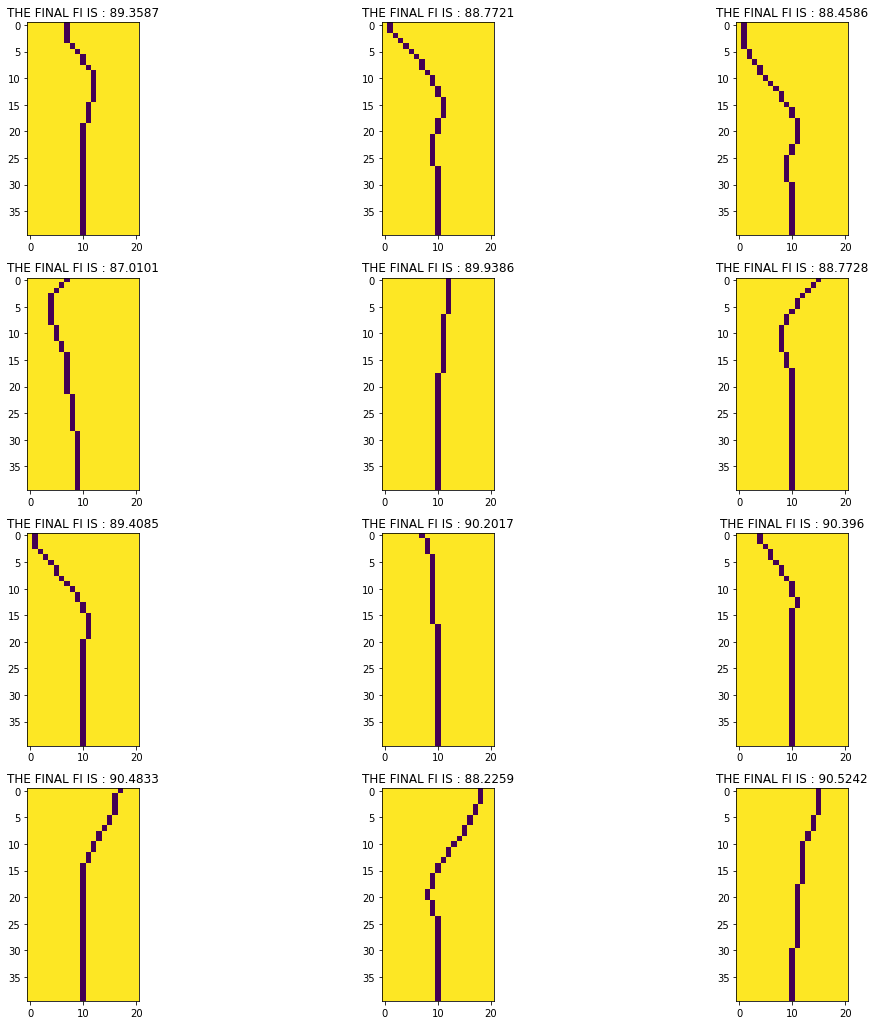

In [177]:
images = [res1,res2,res3,res4]
w=10
h=10
fig=plt.figure(figsize=(18, 18))
columns = 3
rows = 4
for i in range(0, columns*rows ):
    img = reses[i]
    fig.add_subplot(rows, columns, i+1,title='THE FINAL FI IS : '+str(np.round(angels[i],decimals=4)))
  
    plt.imshow(img)
plt.show()

# This is the third part of assignments that we removed lots of data to compare  the result of this part with the previous part 

In [178]:
n_rules = new_rules(rules)
n_rules

In [179]:

angels = []
reses = []
rules = n_rules
pos = [7,-90]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())
angels.append(pos[1])  
######################################################################
pos = [1,0]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())
angels.append(pos[1])  
########################################################################
pos = [1,90]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())
angels.append(pos[1]) 
########################################################################
pos = [7,180]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())
angels.append(pos[1]) 
########################################################################    
pos = [12.71,100.98]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())  
angels.append(pos[1]) 
########################################################################
########################################################################
pos = [15.20,152.24]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())  
angels.append(pos[1]) 
########################################################################
pos = [1.22,-75.2]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy()) 
angels.append(pos[1]) 
########################################################################
pos = [7.48,57.91]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())  
angels.append(pos[1]) 
########################################################################
pos = [4.16,48.21]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())  
angels.append(pos[1]) 
########################################################################
pos = [17,90.84]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())   
angels.append(pos[1]) 
########################################################################
pos = [18,80.]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())   
angels.append(pos[1]) 
########################################################################
pos = [15,60]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())   
angels.append(pos[1]) 
########################################################################
pos = [14,45]
theta = eval_rulse(pos[0],pos[1],rules)
next_pos = [0,0]
ground = np.ones([40,21])
for i in range(40):
    if  math.isnan( pos[0]):
        break
    ground[i,int(pos[0])] = 0
    next_pos[0]= pos[0]+np.cos((pos[1]+theta)*(3.14/180))+np.sin(theta*(3.14/180))*np.sin(pos[1]*(3.14/180))
    next_pos[1]= pos[1]- np.arcsin(2*np.sin(theta*(3.14/180))/4)*(180/3.14)
    theta = eval_rulse(pos[0],pos[1],rules)
    print(pos, theta)
    pos = copy.copy(next_pos)

        
reses.append(ground.copy())   
angels.append(pos[1]) 
########################################################################
# plt.figure(figsize=[10,10])
# to_show = cv.resize(to_show,(1200,1000))
# plt.imshow(to_show,'gray')
print(pos[1])

[7, -90] -40.00000000000001
[7.000610202775657, -71.25146125761518] -40.0
[7.247359129178354, -52.50292251523035] -40.0
[7.714087263997482, -33.75438377284553] -40.00000000000001
[8.35131361487365, -15.005845030460709] -40.0
[9.091481525486738, 3.7426937119241153] -40.0
[9.856120811595753, 22.491232454308935] -40.0
[10.564166913661525, 41.23977119669375] -40.0
[11.140555096664405, 59.988309939078576] -40.0
[11.52417856812388, 78.7368486814634] -40.0
[11.674366820641621, 97.48538742384822] nan
[11.575197386252032, 116.23392616623305] nan
[1, 0] -20.0
[1.939753130473184, 9.846708616080011] -20.0
[2.865676580094336, 19.693417232160023] -20.0
[3.7505180303843977, 29.540125848240034] -20.000000000000004
[4.568234312205961, 39.386834464320046] -21.332828956691223
[5.294757923491949, 49.23354308040006] nan
[5.903347273193217, 59.71374575351557] nan
[1, 90] 20.0
[1.000748350519291, 80.15329138391999] 20.0
[1.1621147493317405, 70.30658276783998] nan
[1.4793497665637947, 60.459874151759976] nan


<ipython-input-170-34a2a972cb60>:58: RuntimeWarning: invalid value encountered in double_scalars
  return up/down


# As you can see the result is awful !!! but we expected that because now we have much more smaller dataset and we can see the truck couldn't finish its mission and stopped at the bigining of the time !!!!

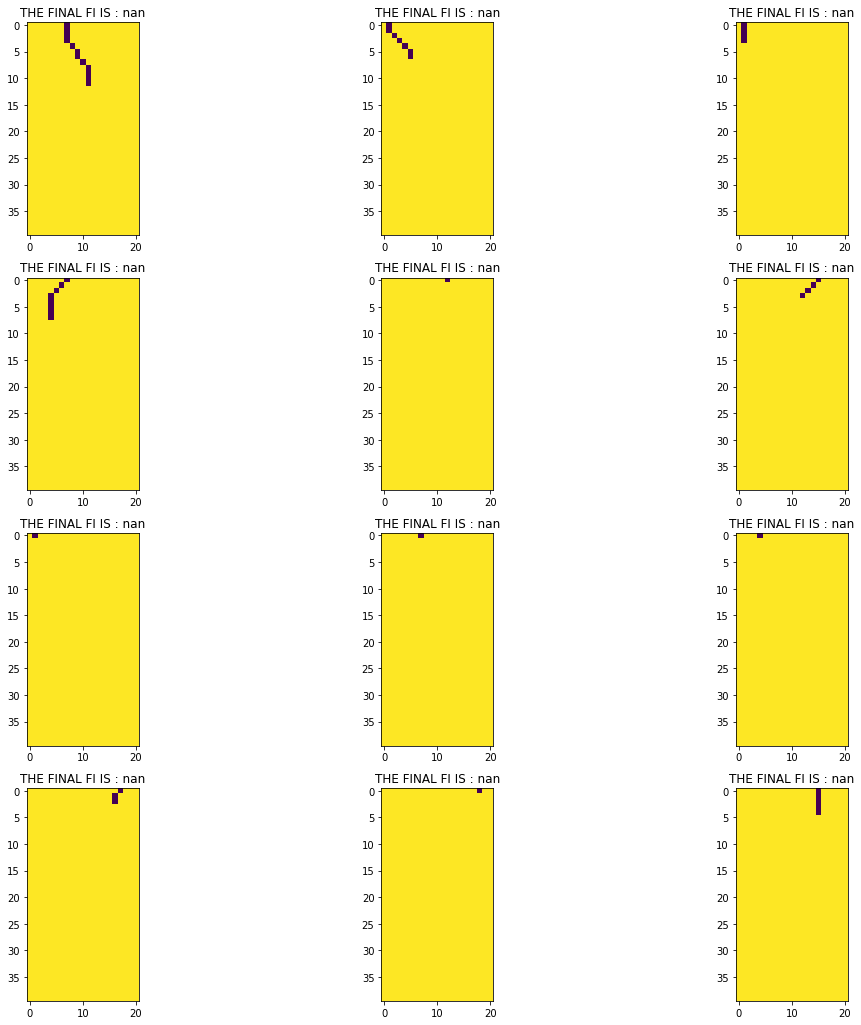

In [180]:
images = [res1,res2,res3,res4]
w=10
h=10
fig=plt.figure(figsize=(18, 18))
columns = 3
rows = 4
for i in range(0, columns*rows ):
    img = reses[i]
    fig.add_subplot(rows, columns, i+1,title='THE FINAL FI IS : '+str(np.round(angels[i],decimals=4)))
  
    plt.imshow(img)
plt.show()

# CONCLUSION
# So fuzzy logic is a nice approch for solving problems without much data but for this problem we can suggest something:
# we are suffering from lack of data that the FI is negative and the algorithm does not work well there so it's good to generate some data with same distribution as past for negative fi and by doing this we can achieve a very high accurate non-linear fuzzy control system :)))))